In [16]:
###############Simulation Set-up: Lehrprobe Lena Janys#######################
###########Laden die erforderlichen Packages###############
library(data.table)
library(tidyr)
library(readr)
library("plm")
library("dplyr")
library('fastDummies')
library("ggplot2")
library(here)
library(tictoc)
library(tidyr)
library(Rfast)
library(pracma)
library(readr)
require(MASS)

ERROR: Error in parse(text = x, srcfile = src): <text>:18:5: unexpected input
17: header-includes: 
18:   - \
        ^


In [3]:
set.seed(19)
label <- c("Realschule", "Gymnasium")
n=50
##y10= = 2,57***--> log bruttostundenlohn für Realschüler
##y13=3.03 log bruttostundenlohn für Gymnasiasten
## Intercept: 2.699, 2.2*1.98+2.57*30.33+2.61*30.97+2.89*5.82+3.03*22.78+2.58*8.12

#####Das kausale Modell simulieren#####
x=c(10,10,10,13,13)
X=sample(x,n,replace=T)
df_X=data.frame(X)
dataf <- dummy_cols(df_X)
eps=rnorm(n,0,2)
Y=c()
for(i in 1:n)
{
  Y[i]=ifelse(X[i]==10,rlnorm(1, meanlog = 2.57, sdlog = 0.0001),rlnorm(1, meanlog = 3.03, sdlog = 0.02))+eps[i]
}

E_YX=lm(Y~dataf[,3])
#####Eine Beobachtung rot faerben#############
factor=rep(0,n)
X[3]=10
Y[3]=10

X[10]=10
Y[10]=13.06582
X[13]=13
Y[13]=20.69723
factor[3]=1
df<-data.frame(Y,dataf,factor)

In [8]:
######Umgekehrte Kausalitaet#############################
set.seed(60)
eps=rnorm(n,0,2)
YR=rlnorm(n,meanlog=3.03*0.4+2.57*0.6,sdlog=0.3)+eps
XR=c()
#####Wir ziehen aus einer log-normal Verteilung############################################################
for(i in 1:n)
{
  XR[i]=ifelse(YR[i]<quantile(YR,prob=0.6),10,13)
}
df_XR=data.frame(XR)
datafR <- dummy_cols(df_XR)
lm(YR~datafR[,3])
########################################################################################
dfR<-data.frame(YR,datafR)


Call:
lm(formula = YR ~ datafR[, 3])

Coefficients:
(Intercept)  datafR[, 3]  
     14.181        7.759  


In [14]:
#####Nicht observierbare, dritte Variable###############################################
c=0.5###Korrelation mit der nicht-observierbaren Variable##############################
set.seed(95)
###Nur eine Approximation, die wahre Korrelation ist etwas verzerrt####################
mult_norm<- mvrnorm(n, c(1.5,0), matrix(c(0.5,c,c,0.5),2,2))
error<- exp(mult_norm)
eps1=error[,1]
nu=error[,2]
XE=ifelse(nu<=quantile(nu,probs=0.6),10,13)
table(XE)
YE=7+eps1
cor(XE,YE)
df_XE=data.frame(XE)
datafE <- dummy_cols(df_XE)
res<-lm(YE~datafE[,3])
########################################################################################
dfE<-data.frame(YE,datafE)

XE
10 13 
30 20 

[1] 0.7484179

**Kausalzusammenhang zwischen X und Y**


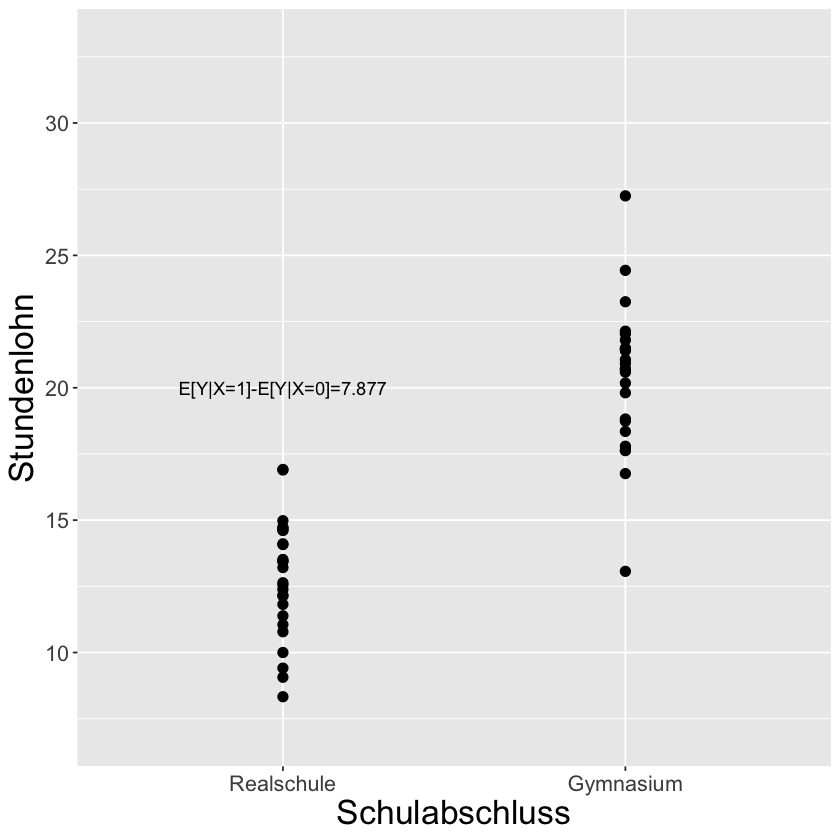

In [17]:
print(
  ggplot(df,aes(x=as.factor(X),y=Y))+
    geom_point(lwd=2.5)+
    scale_x_discrete(labels= label)+ labs(x = "Schulabschluss",y="Stundenlohn")+
    annotate(geom="text", x=as.factor(10), y=20, label="E[Y|X=1]-E[Y|X=0]=7.877")+
    ylim(7,33)+theme(legend.position = "none",text = element_text(size=rel(4.5))))

**Umgekehrte Kausalität**

Warning message:
“Removed 1 rows containing missing values (geom_point).”


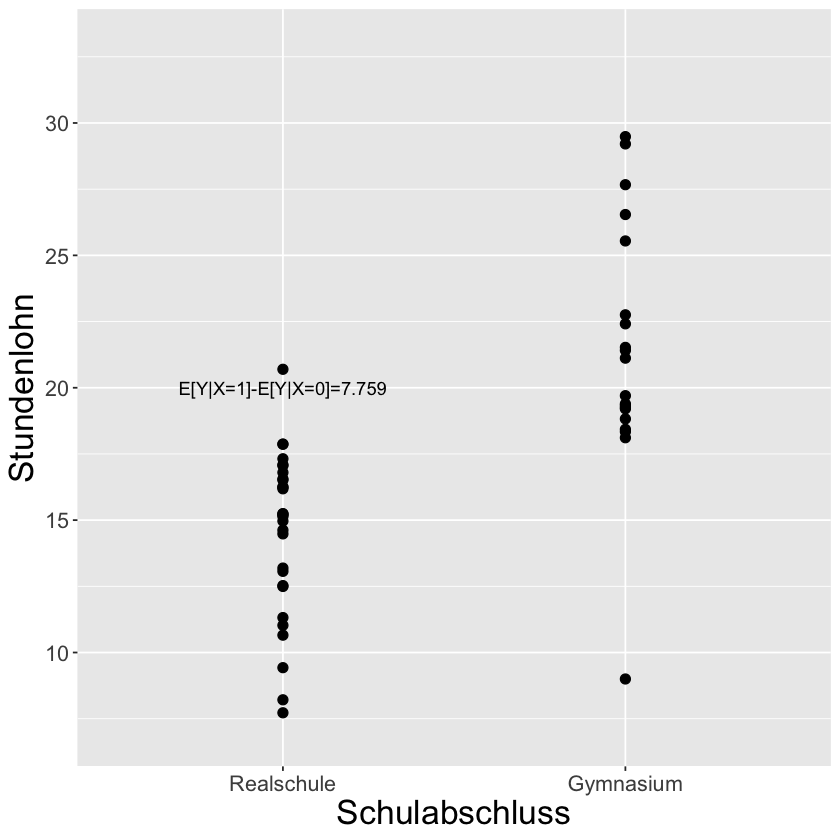

In [18]:
print(
  ggplot(dfR,aes(x=as.factor(XR),y=YR))+
    geom_point(lwd=2.5)+
    scale_x_discrete(labels= label)+ labs(x = "Schulabschluss",y="Stundenlohn")+
    annotate(geom="text", x=as.factor(10), y=20, label="E[Y|X=1]-E[Y|X=0]=7.759")+
    ylim(7,33)+theme(legend.position = "none",text = element_text(size=rel(4.5))))

**Confounder Variable U**

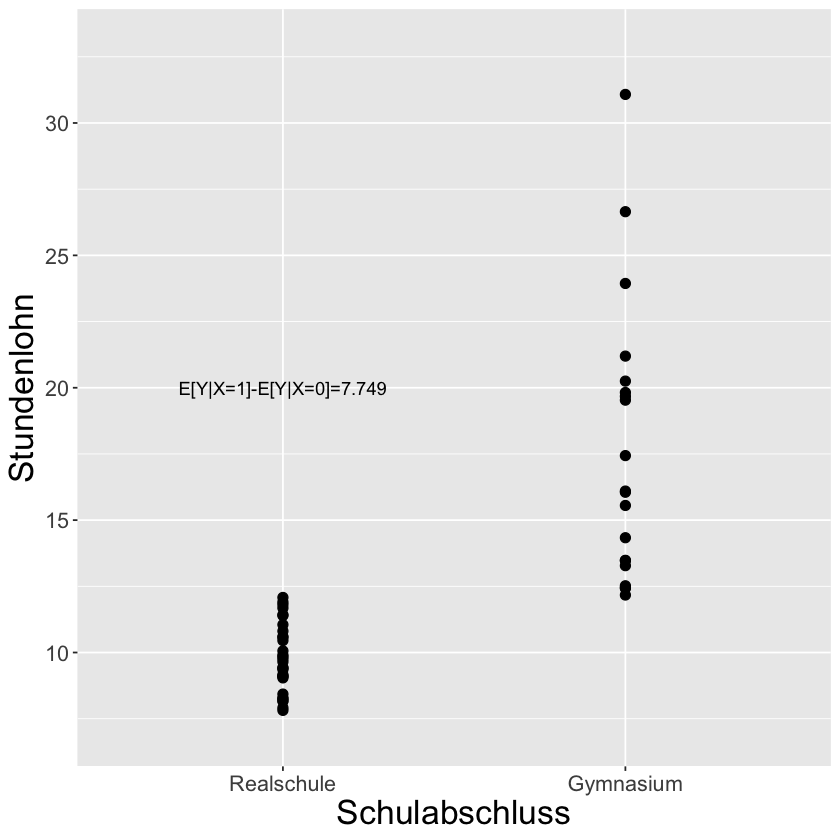

In [12]:
print(
  ggplot(dfE,aes(x=as.factor(XE),y=YE))+
    geom_point(lwd=2.5)+
    scale_x_discrete(labels= label)+ labs(x = "Schulabschluss",y="Stundenlohn")+
  annotate(geom="text", x=as.factor(10), y=20, label="E[Y|X=1]-E[Y|X=0]=7.749")+
    ylim(7,33)+theme(legend.position = "none",text = element_text(size=rel(4.5))))
